In [1]:
import numpy as np
import matplotlib.pyplot as plt
import phate
#import scipy.io
import idx2numpy

In [13]:
from sklearn.cluster import KMeans

In [27]:
from sklearn.metrics.cluster import adjusted_rand_score

In [2]:
Xtrain = idx2numpy.convert_from_file('train-images.idx3-ubyte')
Ytrain = idx2numpy.convert_from_file('train-labels.idx1-ubyte')
Xtest = idx2numpy.convert_from_file('t10k-images.idx3-ubyte')
Ytest = idx2numpy.convert_from_file('t10k-labels.idx1-ubyte')

In [3]:
xTrain = Xtrain.reshape(60000,784)
xTest = Xtest.reshape(10000,784)

In [4]:
phate_operator = phate.PHATE()
tree_phate = phate_operator.fit_transform(xTrain)

Calculating PHATE...
  Running PHATE on 60000 observations and 784 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.63 seconds.
    Calculating KNN search...
    Calculated KNN search in 622.50 seconds.
    Calculating affinities...
    Calculated affinities in 1.46 seconds.
  Calculated graph and diffusion operator in 625.63 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 4.56 seconds.
    Calculating KMeans...
    Calculated KMeans in 6.65 seconds.
  Calculated landmark operator in 12.90 seconds.
  Calculating optimal t...
    Automatically selected t = 25
  Calculated optimal t in 1.22 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.70 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 4.14 seconds.
Calculated PHATE in 644.61 seconds.


In [ ]:
#Let's run this for t=15 instead of the automatically selected t=25

In [7]:
phate_operator2 = phate.PHATE(t=15)
tree_phate2 = phate_operator2.fit_transform(xTrain)

Calculating PHATE...
  Running PHATE on 60000 observations and 784 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 2.14 seconds.
    Calculating KNN search...
    Calculated KNN search in 618.30 seconds.
    Calculating affinities...
    Calculated affinities in 1.51 seconds.
  Calculated graph and diffusion operator in 621.99 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 4.53 seconds.
    Calculating KMeans...
    Calculated KMeans in 6.59 seconds.
  Calculated landmark operator in 12.73 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.66 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 3.94 seconds.
Calculated PHATE in 639.33 seconds.


In [9]:
phate_operator3 = phate.PHATE(t=35)
tree_phate3 = phate_operator3.fit_transform(xTrain)

Calculating PHATE...
  Running PHATE on 60000 observations and 784 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.71 seconds.
    Calculating KNN search...
    Calculated KNN search in 623.95 seconds.
    Calculating affinities...
    Calculated affinities in 1.49 seconds.
  Calculated graph and diffusion operator in 627.20 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 4.52 seconds.
    Calculating KMeans...
    Calculated KMeans in 6.34 seconds.
  Calculated landmark operator in 12.58 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.79 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 4.30 seconds.
Calculated PHATE in 644.87 seconds.


<ipython-input-8-5a40db9bfc0f>:1: DeprecationWarning: Call to deprecated function (or staticmethod) scatter2d. (Use scprep.plot.scatter2d instead) -- Deprecated since version 1.0.0.
  phate.plot.scatter2d(phate_operator,c=Ytrain,cmap="tab10")


<AxesSubplot:>

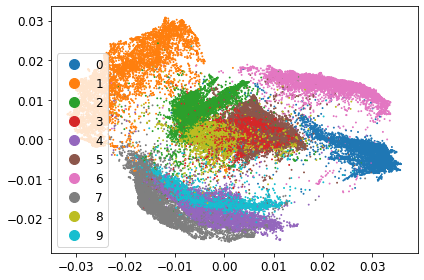

In [8]:
phate.plot.scatter2d(phate_operator,c=Ytrain,cmap="tab10")

<ipython-input-10-f8a6f59b6aab>:1: DeprecationWarning: Call to deprecated function (or staticmethod) scatter2d. (Use scprep.plot.scatter2d instead) -- Deprecated since version 1.0.0.
  phate.plot.scatter2d(phate_operator2,c=Ytrain,cmap="tab10")


<AxesSubplot:>

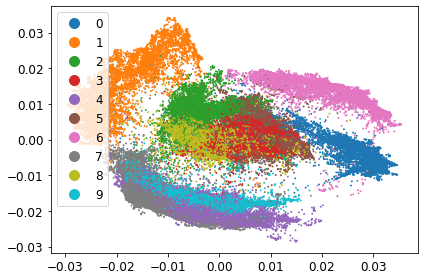

In [10]:
phate.plot.scatter2d(phate_operator2,c=Ytrain,cmap="tab10")

<ipython-input-11-8858e353bcee>:1: DeprecationWarning: Call to deprecated function (or staticmethod) scatter2d. (Use scprep.plot.scatter2d instead) -- Deprecated since version 1.0.0.
  phate.plot.scatter2d(phate_operator3,c=Ytrain,cmap="tab10")


<AxesSubplot:>

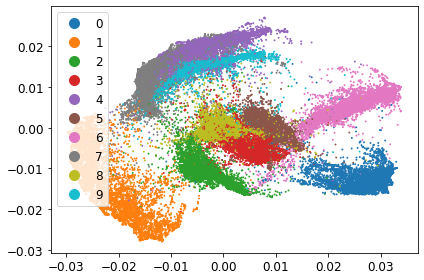

In [11]:
phate.plot.scatter2d(phate_operator3,c=Ytrain,cmap="tab10")

In [ ]:
#Let's see if kmeans can handle our data size. Let's try the test set.

In [15]:
kmeans = KMeans(n_clusters=10, random_state=0)

In [29]:
kMeansFit1 = kmeans.fit(xTrain)

In [26]:
Ytest

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [30]:
kMeansFit1.labels_

array([5, 2, 1, ..., 5, 9, 0], dtype=int32)

In [32]:
adjusted_rand_score(Ytrain,kMeansFit1.labels_)

0.3607179625149027

In [36]:
kmtrans1 = kMeansFit1.transform(xTrain)

In [37]:
kmtrans1

array([[2141.85002582, 2124.92306764, 2023.2597145 , ..., 2095.72830937,
        2313.84440057, 2059.92661299],
       [2344.09339278, 2317.47423275, 1240.78482333, ..., 2220.73980078,
        1709.09583805, 2160.67850459],
       [2170.38846464, 1808.21606486, 2410.92451357, ..., 2176.83788575,
        2488.54928609, 2134.64454891],
       ...,
       [2096.88990154, 1875.66876717, 2187.6045137 , ..., 2345.20033118,
        2412.57654046, 2141.37321584],
       [1978.89714147, 1949.00792497, 1790.4692991 , ..., 1927.52636488,
        2164.65911025, 1658.35651104],
       [1701.06866086, 1980.94095572, 2055.44734431, ..., 1955.43307386,
        2299.7742682 , 1975.42315088]])

In [38]:
tree_phate3km1 = phate_operator3.fit_transform(kmtrans1)

Calculating PHATE...
  Running PHATE on 60000 observations and 10 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 9.53 seconds.
    Calculating affinities...
    Calculated affinities in 0.19 seconds.
  Calculated graph and diffusion operator in 9.75 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 3.96 seconds.
    Calculating KMeans...
    Calculated KMeans in 5.30 seconds.
  Calculated landmark operator in 10.91 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.80 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 3.94 seconds.
Calculated PHATE in 25.40 seconds.


<ipython-input-40-8858e353bcee>:1: DeprecationWarning: Call to deprecated function (or staticmethod) scatter2d. (Use scprep.plot.scatter2d instead) -- Deprecated since version 1.0.0.
  phate.plot.scatter2d(phate_operator3,c=Ytrain,cmap="tab10")


<AxesSubplot:>

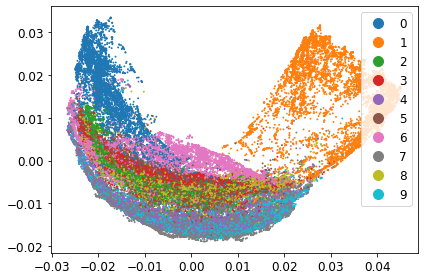

In [40]:
phate.plot.scatter2d(phate_operator3,c=Ytrain,cmap="tab10")

In [41]:
kmPC1 = phate.cluster.kmeans(phate_operator3, n_clusters=10)

In [47]:
adjusted_rand_score(Ytrain,kmPC1)

0.18122232073505923

<ipython-input-45-8858e353bcee>:1: DeprecationWarning: Call to deprecated function (or staticmethod) scatter2d. (Use scprep.plot.scatter2d instead) -- Deprecated since version 1.0.0.
  phate.plot.scatter2d(phate_operator3,c=Ytrain,cmap="tab10")


<AxesSubplot:>

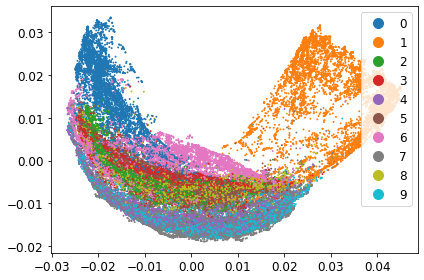

In [45]:
phate.plot.scatter2d(phate_operator3,c=Ytrain,cmap="tab10")

In [44]:
kmPC1

array([5, 1, 3, ..., 5, 5, 7], dtype=int32)